In [33]:
import networkx as nx
import pandas as pd
import numpy as np
from spanning_trees_search.GraphMatrix import GraphMatrix
from spanning_trees_search.SpanningTrees import SpanningTrees

# Reading and exporting graphs, handling martrix representation
- Package supports flexible format handling, in particular, graphs can be stored an loaded in .csv files via pandas dataframe.
- GraphMatrix class supports handling and conversion between indidence matrices, adjacency matrices, degree and laplacian matrices
- Indidence matrices and adjacency matrices can be loaded from .csv file and converted to remaining matrices
- Graph objects in SpanningTree class are networkx objects, thus more formats are supported via [Networkx – Reading and writing graphs](https://networkx.org/documentation/stable/reference/readwrite/index.html) 

## Generating and saving graph files

### Adjacency matrix

In [2]:
# creating adjacency matrix in numpy array
k4_adjacency = np.ones((4, 4)) - np.diag(np.ones(4))
k4_adjacency = k4_adjacency.astype(np.int32)
print("Adjacency matrix of K4 fully connected graph")
print(k4_adjacency)

Adjacency matrix of K4 fully connected graph
[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]


In [12]:
# converting into pandas dataframe
df_k4 = pd.DataFrame(k4_adjacency)
df_k4

,0,1,2,3
0,0,1,1,1
1,1,0,1,1
2,1,1,0,1
3,1,1,1,0


In [13]:
# saving pandas dataframe to csv
df_k4.to_csv('tests/saving/k4_adjacency.csv')

### Incidence matrix

In [5]:
# creating adjacency matrix in numpy array
k4_incidence = np.array([[1, 1, 0, 0,],
                        [1, 0, 1, 0,],
                        [1, 0, 0, 1,],
                        [0, 1, 1, 0,],
                        [0, 1, 0, 1,],
                        [0, 0, 1, 1,]]).T
print("Incidence matrix of K4")
print(k4_incidence)

Incidence matrix of K4
[[1 1 1 0 0 0]
 [1 0 0 1 1 0]
 [0 1 0 1 0 1]
 [0 0 1 0 1 1]]


In [6]:
# converting into pandas dataframe
df_k4 = pd.DataFrame(k4_incidence)
df_k4

,0,1,2,3,4,5
0,1,1,1,0,0,0
1,1,0,0,1,1,0
2,0,1,0,1,0,1
3,0,0,1,0,1,1


In [7]:
# saving pandas dataframe to csv
df_k4.to_csv('tests/saving/k4_incidence.csv')

### Saving via GraphMatrix

In [3]:
k4_graphmatrix = GraphMatrix()
k4_graphmatrix.adjacency_matrix = k4_adjacency 
k4_graphmatrix.save_csv('tests/saving/k4_adjacency_graphmatrix.csv')
k4_graphmatrix.save_figure('tests/saving/k4_adjacency_graphmatrix.png')

### Saving via NetworkX

### Loading

In [3]:
graphA = GraphMatrix()
graphA.load('tests/saving/k4_adjacency.csv', mode="adjacency")
graphB = GraphMatrix()
graphB.load('tests/saving/k4_incidence.csv', mode="incidence")

1) Adjacency matrix loaded.
2) Remaining matrices computed.
1) Incidence matrix loaded.
2) Remaining matrices computed.


Are the the two graphs the same? Do the matrices match?


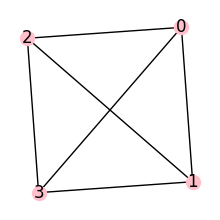

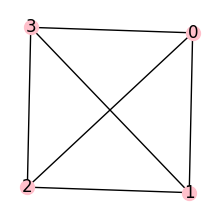

In [3]:
print("Are the the two graphs the same? Do the matrices match?")

graphA.visualise()
graphB.visualise()

In [4]:
print(graphA.adjacency_matrix == graphB.adjacency_matrix)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [5]:
print(graphA.incidence_matrix == graphB.incidence_matrix)

[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]


### Computing remaining matrices

In [4]:
k4 = graphA
k4.compute_remaining_matrices()
print("Adjacency matrix of K4")
print(k4.adjacency_matrix)
print("Incidence matrix of K4")
print(k4.incidence_matrix)
print("Laplacian matrix of K4")
print(k4.laplacian_matrix)
print("Degree matrix of K4")
print(k4.degree_matrix)
print("Laplacian adjugate matrix of K4")
print(k4.laplacian_adjugate_matrix)

Matrices already computed. No need to compute again. Skipping.
Adjacency matrix of K4
[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]
Incidence matrix of K4
[[1 1 1 0 0 0]
 [1 0 0 1 1 0]
 [0 1 0 1 0 1]
 [0 0 1 0 1 1]]
Laplacian matrix of K4
[[ 3 -1 -1 -1]
 [-1  3 -1 -1]
 [-1 -1  3 -1]
 [-1 -1 -1  3]]
Degree matrix of K4
[[3 0 0 0]
 [0 3 0 0]
 [0 0 3 0]
 [0 0 0 3]]
Laplacian adjugate matrix of K4
[[16 16 16 16]
 [16 16 16 16]
 [16 16 16 16]
 [16 16 16 16]]


### Matrix computation of spanning trees
- When all matrices are computed, the number of spanning trees emerges as a subdeterminant of laplacian matrix, thus any [i,j] integer from laplacian adjugate

In [4]:
print("This is the number of spanning trees of K4:")
print(k4.adjugate_subdeterminant)

This is the number of spanning trees of K4:
16


In [5]:
trees = SpanningTrees(nx.from_numpy_matrix(k4.adjacency_matrix))

/Users/miroslavlzicar/Documents/Github/Spanning-trees-search/spanning_trees_search/SpanningTrees.py:18: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.graph_matrix.adjacency_matrix = np.array(nx.adjacency_matrix(self.nx_graph).todense())


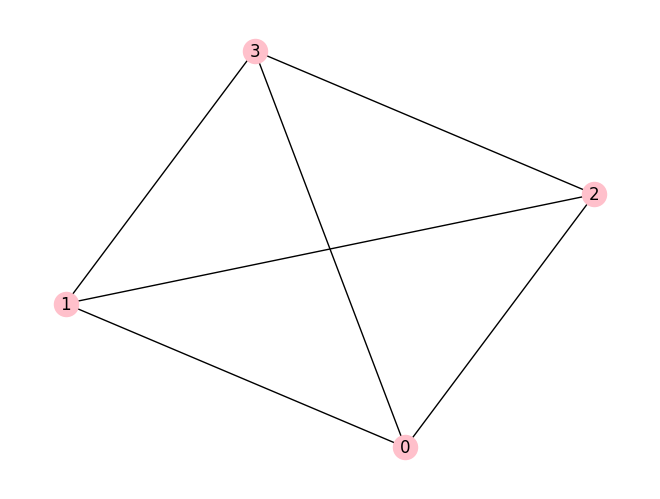

In [6]:
trees.preview()

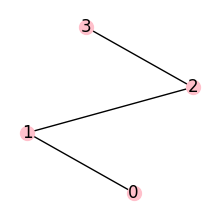

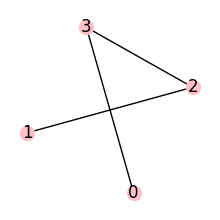

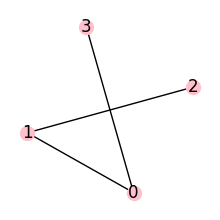

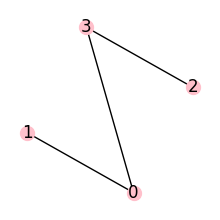

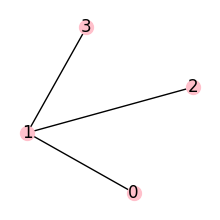

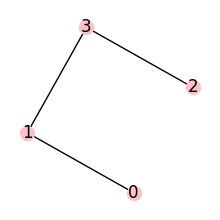

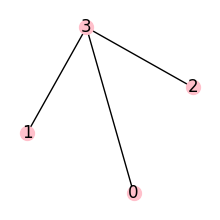

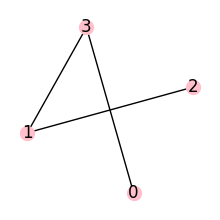

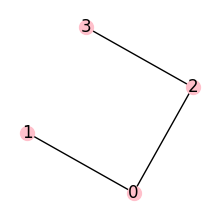

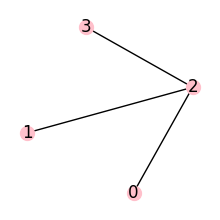

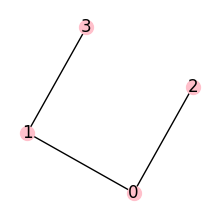

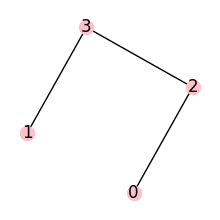

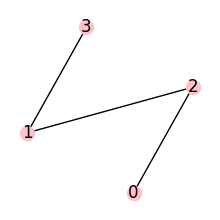

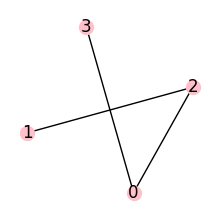

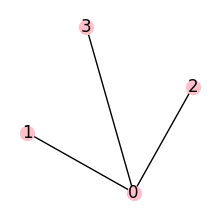

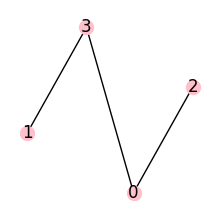

In [7]:
trees.compute_spanning_trees(visualisation='plots_inline')

In [8]:
trees.spanning_trees

In [8]:
trees.export_spanning_trees(save_path="tests/k4_run")

/Users/miroslavlzicar/Documents/Github/Spanning-trees-search/spanning_trees_search/SpanningTrees.py:18: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.graph_matrix.adjacency_matrix = np.array(nx.adjacency_matrix(self.nx_graph).todense())


In [24]:
trees.export_gif()

ValueError: The image must have at least two spatial dimensions.

<img src="spanning_tree02.gif" align="center">

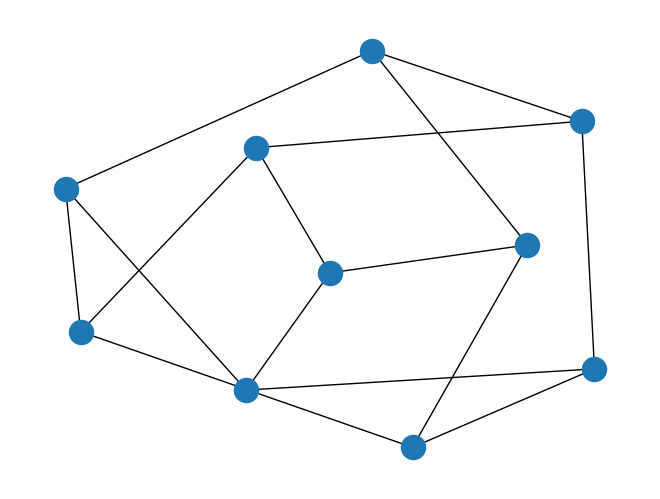

In [26]:
g = nx.petersen_graph()
mypos = nx.
nx.draw(nx.petersen_graph(), pos=nx.spring_layout(nx.petersen_graph()), with_labels=True)

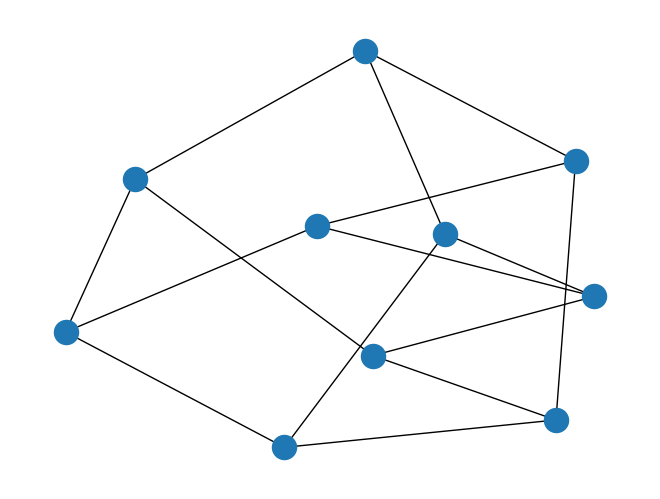

In [28]:
nx.draw(nx.petersen_graph())

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def calc_petersen_graph_pos():
    r = 2
    R = 2*r
    pos = {}
    delta = 2*math.pi/5
    curRadius = math.pi/2
    for i in range(5):
        pos[i] = (R*math.cos(curRadius), R*math.sin(curRadius))
        pos[i+5] = (r*math.cos(curRadius), r*math.sin(curRadius))
        curRadius += delta
    return pos

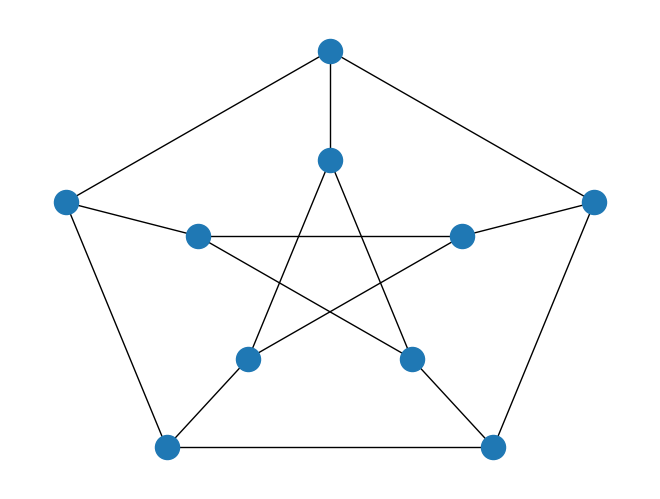

In [32]:
nx.draw(nx.petersen_graph(), calc_petersen_graph_pos())